<a href="https://colab.research.google.com/github/alizia-dev/Today_i_Fixed_.Net/blob/main/AliZia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Pre-Processing and Visualization

In [7]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/organizations.csv')
data.head()

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,FAB0d41d5b5d22c,Ferrell LLC,https://price.net/,Papua New Guinea,Horizontal empowering knowledgebase,1990,Plastics,3498.0
1,2,6A7EdDEA9FaDC52,"Mckinney, Riley and Day",http://www.hall-buchanan.info/,Finland,User-centric system-worthy leverage,2015,Glass / Ceramics / Concrete,4952.0
2,3,0bFED1ADAE4bcC1,Hester Ltd,http://sullivan-reed.com/,China,Switchable scalable moratorium,1971,Public Safety,5287.0
3,4,2bFC1Be8a4ce42f,Holder-Sellers,https://becker.com/,Turkmenistan,De-engineered systemic artificial intelligence,2004,Automotive,921.0
4,5,9eE8A6a4Eb96C24,Mayer Group,http://www.brewer.com/,Mauritius,Synchronized needs-based challenge,1991,Transportation,7870.0


In [8]:
'''
Print the names of all columns in the dataset.
'''
# YOUR CODE HERE
print(data.columns)


Index(['Index', 'Organization Id', 'Name', 'Website', 'Country', 'Description',
       'Founded', 'Industry', 'Number of employees'],
      dtype='object')


In [9]:
print(data.dtypes)

Index                    int64
Organization Id         object
Name                    object
Website                 object
Country                 object
Description             object
Founded                  int64
Industry                object
Number of employees    float64
dtype: object


In [10]:
df = data.copy()

In [11]:
len(df)

100

In [12]:
## Get basic statistics of the numerical columns
df.describe()

,Index,Founded,Number of employees
count,100.000000,100.000000,98.000000
mean,50.500000,1995.410000,5023.081633
std,29.011492,15.744228,2848.541597
min,1.000000,1970.000000,0.000000
25%,25.750000,1983.500000,2804.250000
50%,50.500000,1995.000000,4947.000000
75%,75.250000,2010.250000,7616.000000
max,100.000000,2021.000000,9995.000000


In [13]:
df.isnull().sum()

Index                  0
Organization Id        0
Name                   0
Website                0
Country                0
Description            0
Founded                0
Industry               0
Number of employees    2
dtype: int64

In [14]:
df['Number of employees'].value_counts()

3498.0    1
5004.0    1
6874.0    1
6146.0    1
563.0     1
         ..
365.0     1
4155.0    1
7664.0    1
1046.0    1
2785.0    1
Name: Number of employees, Length: 98, dtype: int64

In [15]:
df['Number of employees'].unique()

array([3498., 4952., 5287.,  921., 7870., 4914., 7832., 4389., 8167.,
       9698., 7473., 9011., 2862., 9079.,  769., 8508., 6986., 4589.,
       7961., 5984., 5010., 2185., 8987., 5038., 1215., 4941., 3122.,
       1046., 7664., 4155.,  365., 6135., 4516., 7443., 2610., 1312.,
       1638., 9995., 3715., 3585., 9067., 1678., 3816., 7645., 7034.,
       1746., 3987., 9443., 2073., 9069., 3527., 8445., 3450., 1825.,
       4942., 1418., 7202., 8245., 8741., 6923.,  346., 9097., 2992.,
       9315., 7829.,  602., 2911., 3934., 5130.,  563., 6146., 6874.,
        696., 5004., 8480., 7012., 7529.,  869., 6182., 7805., 8433.,
       4044., 7013., 5571., 2880., 2215., 5786., 6168., 7484., 1927.,
       3881.,   nan, 8172., 1483., 4873.,    0., 4292.,  236., 2785.])

In [16]:
'''
Some "Number of employees" values are missing (NaN), fill them by taking the average of the "Number of employees" values in the rows above and below.
Incase the "Number of employees" value in the row below is also missing, use only the row above.
'''
# YOUR CODE HERE
nulls = np.where(df['Number of employees'].isnull())
df['Number of employees'] = np.where(df['Number of employees'].isnull(), 0, df['Number of employees'])

for index in nulls[0]:
    df['Number of employees'][index] = (df['Number of employees'][index-1] + df['Number of employees'][index+1])/2

df.isnull().sum()

Index                  0
Organization Id        0
Name                   0
Website                0
Country                0
Description            0
Founded                0
Industry               0
Number of employees    0
dtype: int64

In [17]:
nulls[0]

array([91, 98])

In [18]:
df.head()

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,FAB0d41d5b5d22c,Ferrell LLC,https://price.net/,Papua New Guinea,Horizontal empowering knowledgebase,1990,Plastics,3498.0
1,2,6A7EdDEA9FaDC52,"Mckinney, Riley and Day",http://www.hall-buchanan.info/,Finland,User-centric system-worthy leverage,2015,Glass / Ceramics / Concrete,4952.0
2,3,0bFED1ADAE4bcC1,Hester Ltd,http://sullivan-reed.com/,China,Switchable scalable moratorium,1971,Public Safety,5287.0
3,4,2bFC1Be8a4ce42f,Holder-Sellers,https://becker.com/,Turkmenistan,De-engineered systemic artificial intelligence,2004,Automotive,921.0
4,5,9eE8A6a4Eb96C24,Mayer Group,http://www.brewer.com/,Mauritius,Synchronized needs-based challenge,1991,Transportation,7870.0


In [26]:
'''
Get the number of employees which have under year 2000 - 2012
'''
# Code
filtered_df = df[(df['Founded'] >= 2000) & (df['Founded'] <= 2012)]

# Select only the 'Number of employees' column
number_of_employees_column = filtered_df['Number of employees']

# Print the result
print(number_of_employees_column)

    Index  Organization Id                        Name  \
3       4  2bFC1Be8a4ce42f              Holder-Sellers   
10     11  AE61b8Ffebbc476                  Kidd Group   
19     20  c1Ce9B350BAc66b              Weiss and Sons   
24     25  5fDBeA8BB91a000                 Jenkins Inc   
25     26  dFfD6a6F9AC2d9C  Greene, Benjamin and Novak   
35     36  4D4d7E18321eaeC                  Pineda-Cox   
38     39  6883A965c7b68F7                    Hahn PLC   
40     41  decab0D5027CA6a                  Arroyo Inc   
45     46  1eD64cFe986BBbE              Walton-Barnett   
52     53  EF5B55FadccB8Fe            Charles-Phillips   
53     54  f8D4B99e11fAF5D                    Odom Ltd   
55     56  B9BdfEB6D3Ca44E                 Sampson Ltd   
59     60  aAeb29ad43886C6                Potter-Walsh   
72     73  dfcA1c84AdB61Ac               Mccall-Holmes   
75     76  ec5Bdd3CBAfaB93     Cole, Russell and Avery   
76     77  DDB19Be7eeB56B4              Cummings-Rojas   
80     81  Ea3

<Axes: >

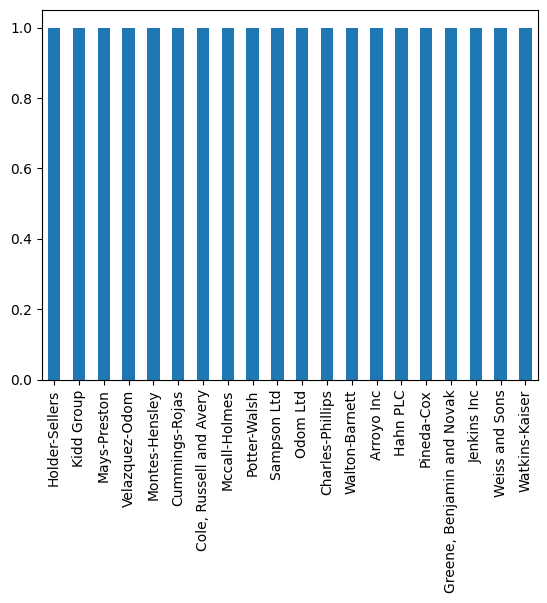

In [34]:
# Organization name, that founded between 2000-2012
filtered_df['Name'].value_counts().plot(kind = 'bar')

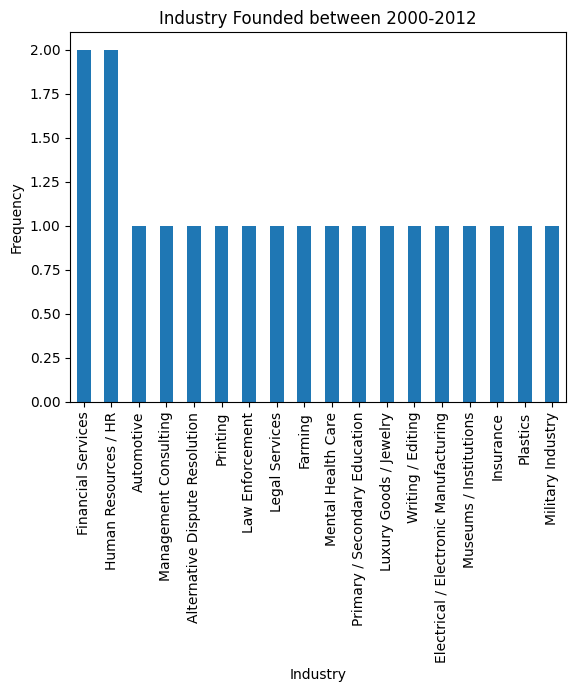

In [35]:
'''
Create a histogram of the total counts of Industry in the dataset.
'''

plt.figure()
filtered_df['Industry'].value_counts().plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.title('Industry Founded between 2000-2012')
plt.show()

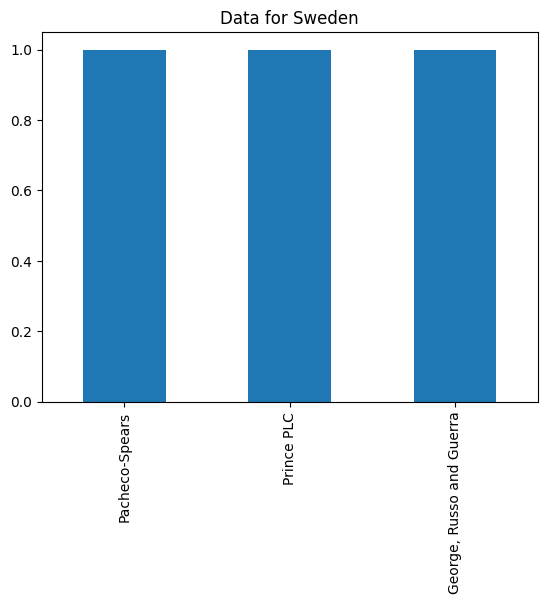

In [37]:
'''
Get the data in Sweden Country.
'''
# YOUR CODE HERE
sweden_df = df[df['Country'] == 'Sweden']

plt.figure()
sweden_df['Name'].value_counts().plot(kind='bar')
plt.title('Data for Sweden')
plt.show()

In [39]:
filtered_df.groupby('Country')['Founded'].mean()

Country
Belarus                         2012.0
Benin                           2009.0
Bolivia                         2010.0
Bouvet Island (Bouvetoya)       2001.0
Cayman Islands                  2005.0
Cote d'Ivoire                   2012.0
Djibouti                        2002.0
Grenada                         2006.0
Korea                           2011.0
Liechtenstein                   2009.0
Mali                            2006.0
Mongolia                        2000.0
Romania                         2012.0
South Africa                    2002.0
Svalbard & Jan Mayen Islands    2012.0
Togo                            2009.0
Turkey                          2008.0
Turkmenistan                    2004.0
Western Sahara                  2001.0
Name: Founded, dtype: float64

<Axes: xlabel='Country'>

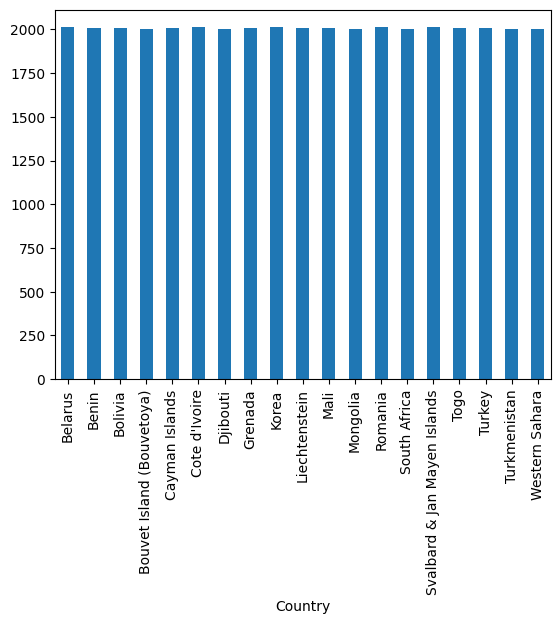

In [40]:
filtered_df.groupby('Country')['Founded'].mean().plot(kind = 'bar')